# Credit Card Fraud Detection

## Overview

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. The dataset is downloaded from Kaggle ( https://www.kaggle.com/mlg-ulb/creditcardfraud ).

## Variable Description

* **Time**: The seconds elapsed between each transaction and the first transaction in the dataset.
* **V1 to V28**: Principle components
* **Amount**: Transaction amount (in EUR)
* **Class**: The actual classfication classes (0 = Normal transaction, 1 = Fraud)

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
cc_df = pd.read_csv("creditcard.csv")
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
cc_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [141]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [142]:
cc_df, NAlist = reduce_mem_usage(cc_df)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 67.3601303100586  MB
******************************
Column:  Time
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  V1
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V2
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V3
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V4
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V5
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V7
dtype before:  float64
dtype after:  float32
***************

In [143]:
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47488.145955,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120117,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


In [144]:
print('Normal transactions: ', str(sum(cc_df.Class == 0)))
print('Frauds: ', str(sum(cc_df.Class == 1)))
print('Fraud %: ', str(float(sum(cc_df.Class == 1))/float(len(cc_df.Class))*100.0))

Normal transactions:  284315
Frauds:  492
Fraud %:  0.1727485630620034


In [145]:
pd.value_counts(cc_df['Class'])

0    284315
1       492
Name: Class, dtype: int64

Text(0,0.5,'Frequency')

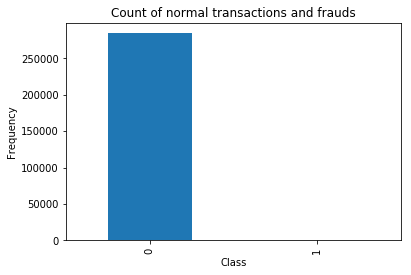

In [146]:
pd.value_counts(cc_df['Class'], sort=True).plot(kind='bar')
plt.title('Count of normal transactions and frauds')
plt.xlabel('Class')
plt.ylabel('Frequency')

Text(0,0.5,'EUR')

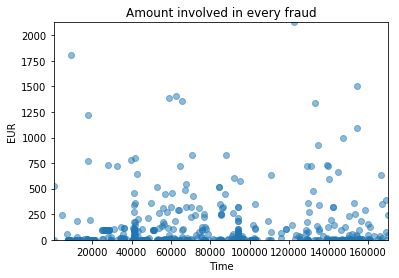

In [147]:
plt.scatter(cc_df['Time'][cc_df.Class==1], cc_df['Amount'][cc_df.Class==1], alpha=0.5)
plt.margins(0)
plt.title('Amount involved in every fraud')
plt.xlabel('Time')
plt.ylabel('EUR')

Text(0,0.5,'EUR')

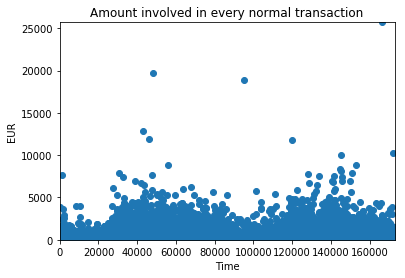

In [148]:
plt.scatter(cc_df['Time'][cc_df.Class==0], cc_df['Amount'][cc_df.Class==0])
plt.margins(0)
plt.title('Amount involved in every normal transaction')
plt.xlabel('Time')
plt.ylabel('EUR')

In [149]:
cc_df.isnull().sum().any()

False

Populating the interactive namespace from numpy and matplotlib


C:\Users\Prabodh\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


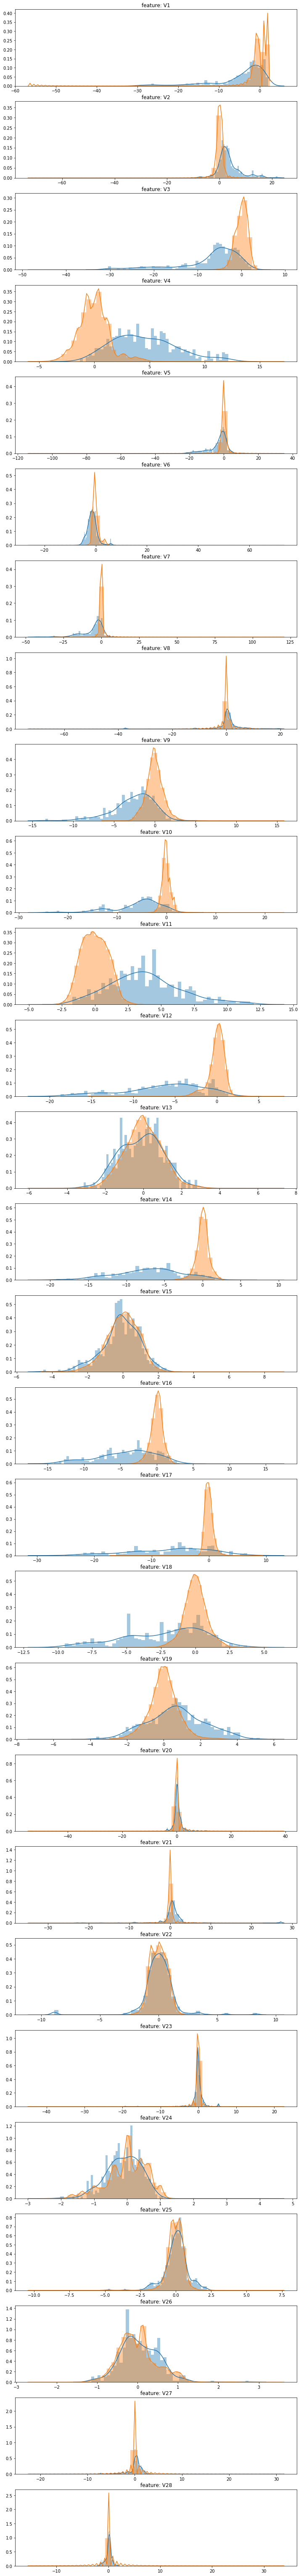

In [150]:
%pylab inline
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cc_df[cc_df.iloc[:, 1:29].columns]):
   ax = plt.subplot(gs[i])
   sns.distplot(cc_df[cn][cc_df.Class == 1], bins=50)
   sns.distplot(cc_df[cn][cc_df.Class == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(cn))
plt.show()

## Data Preprocessing

The dataset is free of null values. We will drop some features that have distributed in a similar manner.

In [151]:
cc_df = cc_df.drop(['V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

We need to normalize the amount variable.

In [152]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cc_df['Amount_Norm'] = ss.fit_transform(cc_df['Amount'].reshape(-1, 1))
cc_df = cc_df.drop(['Time', 'Amount'], axis=1)
cc_df.head()

C:\Users\Prabodh\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,Amount_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0,-0.073403


Split into training and test set

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X = cc_df.drop('Class', axis=1)
y = cc_df.Class

Switch labels of target variable.
Normal Transaction -> 1
Fraud -> 0

In [156]:
y = y.apply(lambda x: 1 if x==0 else 0)
y.value_counts()

1    284315
0       492
Name: Class, dtype: int64

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Resampling the training set

In [158]:
from imblearn.over_sampling import SMOTE
X_train_resample, y_train_resample = SMOTE().fit_sample(X_train, y_train)

In [159]:
print('No. of transactions after resampling: ', (len(X_train_resample)))
print('No. of normal transactions: ', sum(y_train_resample==0))
print('No. of frauds: ', sum(y_train_resample==1))

No. of transactions after resampling:  454908
No. of normal transactions:  227454
No. of frauds:  227454


## Machine Learning

In [160]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [161]:
lr = LogisticRegressionCV()
rf = RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1)
MLA = [lr, rf]

In [162]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [163]:
from sklearn.metrics import precision_score, roc_curve, auc
row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train_resample, y_train_resample).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Name'] = MLA_name
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare

,Name,Precision,AUC
0,LogisticRegressionCV,0.999855,0.946977
1,RandomForestClassifier,0.999771,0.934448


In [167]:
import xgboost as xgb

In [168]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [177]:
xgb_param = {'booster':'gbtree', 'objective':'binary:logistic', 'eta':0.3, 'gamma':0, 'max_depth':6, 
             'min_child_weight':1, 'subsample':1, 'colsample_bytree':1, 'scale_pos_weight':1,'eval_metric':'error'}

In [178]:
xgbcv = xgb.cv(xgb_param, dtrain, num_boost_round=200, nfold=5, show_stdv=True, 
               stratified=True, early_stopping_rounds=20, maximize=False)

[11:15:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[11:15:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[11:15:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[11:15:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[11:15:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[11:15:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[11:15:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:16:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[11:16:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[11:16:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[11:16:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[11:16:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[11:16:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[11:16:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:16:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[11:16:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[11:16:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[11:16:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[11:16:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[11:16:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[11:16:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:16:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[11:16:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[11:16:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[11:16:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[11:16:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[11:16:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[11:17:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [181]:
print('Best iteration = {}'.format(xgbcv.shape[0]))

Best iteration = 19


In [180]:
xgb_param = {'booster':'gbtree', 'objective':'binary:logistic', 'eta':0.1, 'gamma':0, 'max_depth':6, 
             'min_child_weight':1, 'subsample':1, 'colsample_bytree':0.3, 'scale_pos_weight':1,'eval_metric':'error'}

In [182]:
xgb_model = xgb.train(xgb_param, dtrain, num_round, evals=evallist, maximize=False)

[11:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-error:0.000509	train-error:0.000382
[11:19:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-error:0.000527	train-error:0.000356
[11:19:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-error:0.000527	train-error:0.000342
[11:19:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[3]	eval-error:0.000544	train-error:0.000338
[11:19:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[4]	eval-error:0.000544	train-error:0.000334
[11:19:30] C:\Users\

In [183]:
pred_xgb = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)

In [188]:
fpr, tpr, threshold = roc_curve(y_test, pred_xgb)
roc_auc = auc(fpr, tpr)
ps = precision_score(y_test, y_pred)

In [189]:
print("AUC of XGBoost: ", roc_auc)
print("Precision of XGBoost: ", ps)

AUC of XGBoost:  0.9619767572860063
Precision of XGBoost:  0.9997530994832725


## XGBoost returned the highest AUC score